# Analytics for Hospitals' Health-Care Data
## Team ID - PNT2022TMID21113

### Importing the downloaded dataset

In [270]:
import os
for dirname, _, filenames in os.walk(r'C:\Users\J\Downloads\Healthcare_Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\J\Downloads\Healthcare_Data\sample_sub.csv
C:\Users\J\Downloads\Healthcare_Data\test_data.csv
C:\Users\J\Downloads\Healthcare_Data\train_data.csv
C:\Users\J\Downloads\Healthcare_Data\train_data_dictionary.csv


In [271]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})

from warnings import filterwarnings
filterwarnings('ignore')
 
from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [272]:
train  = pd.read_csv(r'C:\Users\J\Downloads\Healthcare_Data\train_data.csv')
test = pd.read_csv(r'C:\Users\J\Downloads\Healthcare_Data\test_data.csv')

In [273]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [274]:
print(train.shape)
print(test.shape)

(318438, 18)
(137057, 17)


In [275]:
train.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [276]:
train.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

### Checking for Duplicates

In [277]:
train.duplicated().sum()

0

### Changing Data Types
##### For Train Data

In [278]:
train['Hospital_code'] = train['Hospital_code'].astype(object)
train['City_Code_Hospital'] = train['City_Code_Hospital'].astype(object)
train['Available Extra Rooms in Hospital'] = train['Available Extra Rooms in Hospital'].astype(object)
train['Bed Grade'] = train['Bed Grade'].astype(object)
train['City_Code_Patient'] = train['City_Code_Patient'].astype(object)

In [279]:
train.dtypes

case_id                                int64
Hospital_code                         object
Hospital_type_code                    object
City_Code_Hospital                    object
Hospital_region_code                  object
Available Extra Rooms in Hospital     object
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                             object
patientid                              int64
City_Code_Patient                     object
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

##### For Test Data

In [280]:
test['Hospital_code'] = test['Hospital_code'].astype(object)
test['City_Code_Hospital'] = test['City_Code_Hospital'].astype(object)
test['Available Extra Rooms in Hospital'] = test['Available Extra Rooms in Hospital'].astype(object)
test['Bed Grade'] = test['Bed Grade'].astype(object)
test['City_Code_Patient'] = test['City_Code_Patient'].astype(object)

In [281]:
test.dtypes

case_id                                int64
Hospital_code                         object
Hospital_type_code                    object
City_Code_Hospital                    object
Hospital_region_code                  object
Available Extra Rooms in Hospital     object
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                             object
patientid                              int64
City_Code_Patient                     object
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
dtype: object

### Removing Insignificant Variables

In [282]:
train.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [283]:
test.drop(['case_id', 'patientid'], axis=1, inplace=True)

### Data Modifications
### i) Stay

In [284]:
train['Stay'] .replace ('More than 100 Days', '100+', inplace=True)

### Distribution of numeric independent variables

<Figure size 1500x800 with 0 Axes>

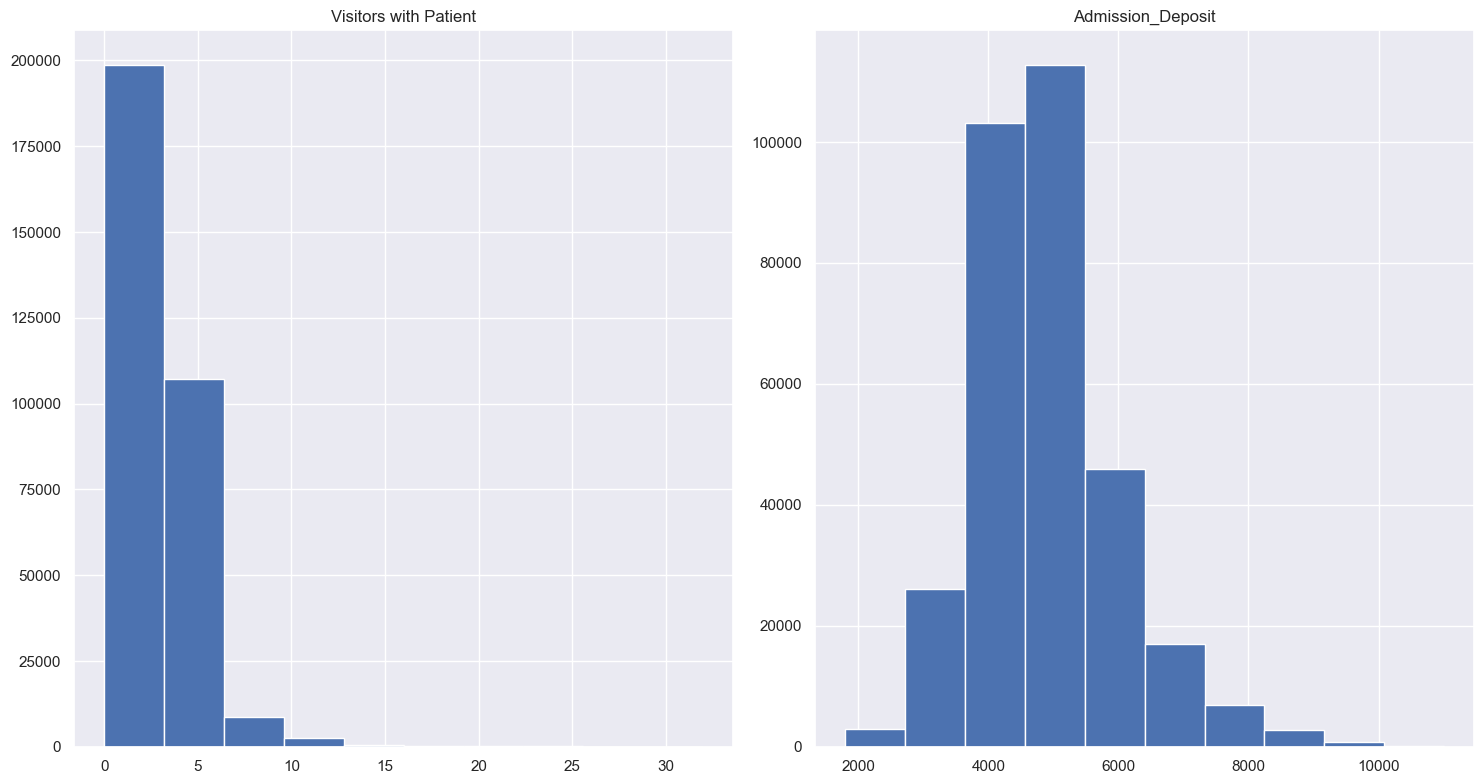

Skewness:


Hospital_code                       -0.280783
City_Code_Hospital                   0.538809
Available Extra Rooms in Hospital    0.971930
Bed Grade                            0.051754
City_Code_Patient                    1.581736
Visitors with Patient                3.137125
Admission_Deposit                    0.931454
dtype: float64

In [285]:
plt.figure(figsize=(15,8))

train.drop('Stay', axis = 1).hist()
plt.tight_layout()
plt.show()  

print('Skewness:')
train.drop('Stay', axis = 1).skew()

### Exporatory Data Analysis
#### Univariate Analysis

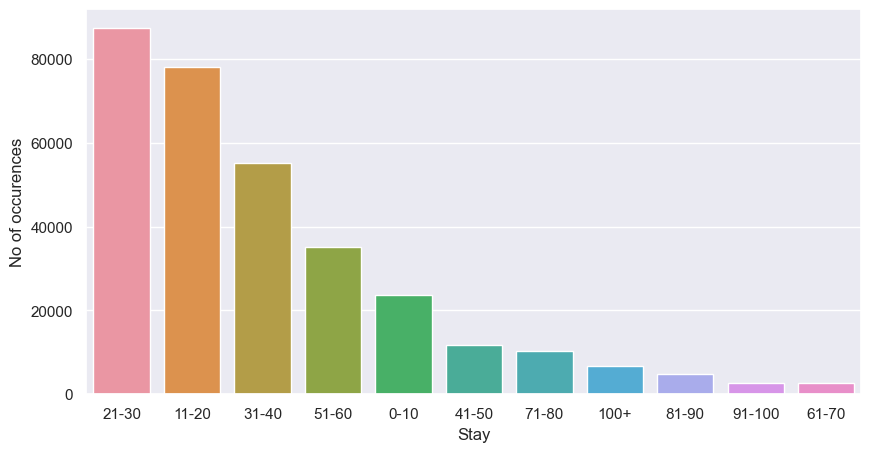

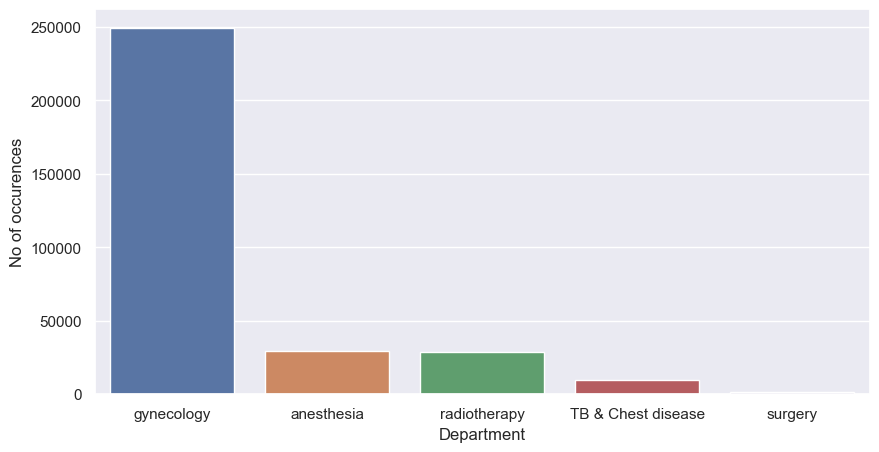

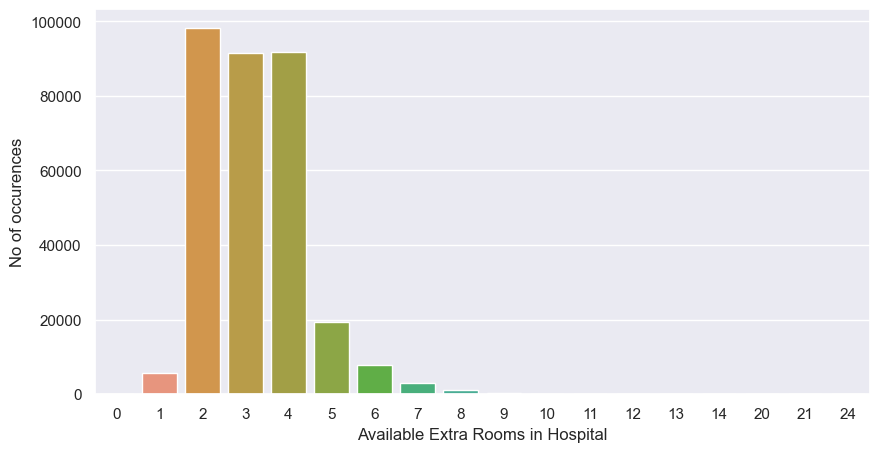

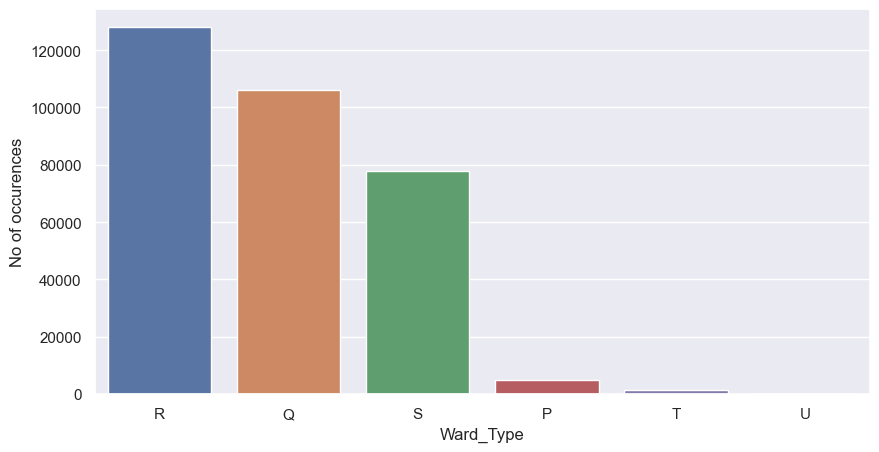

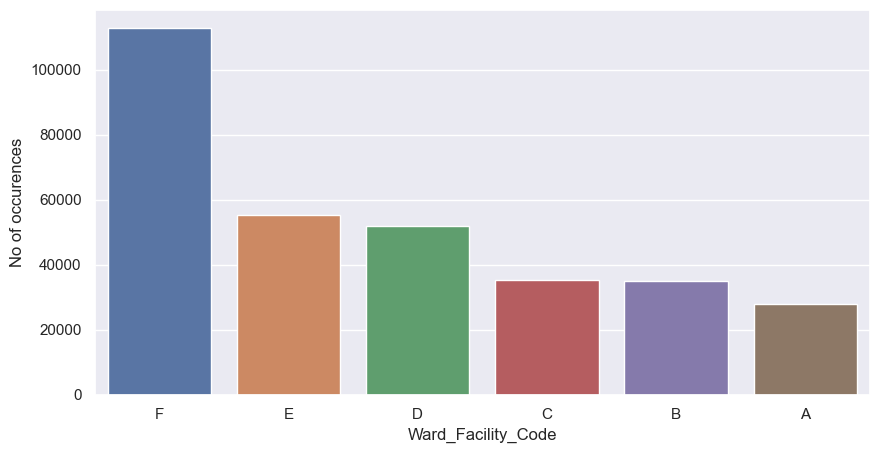

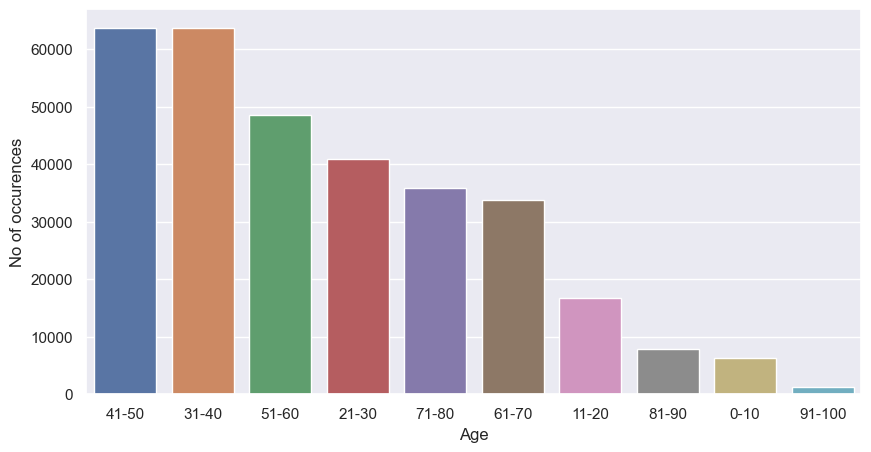

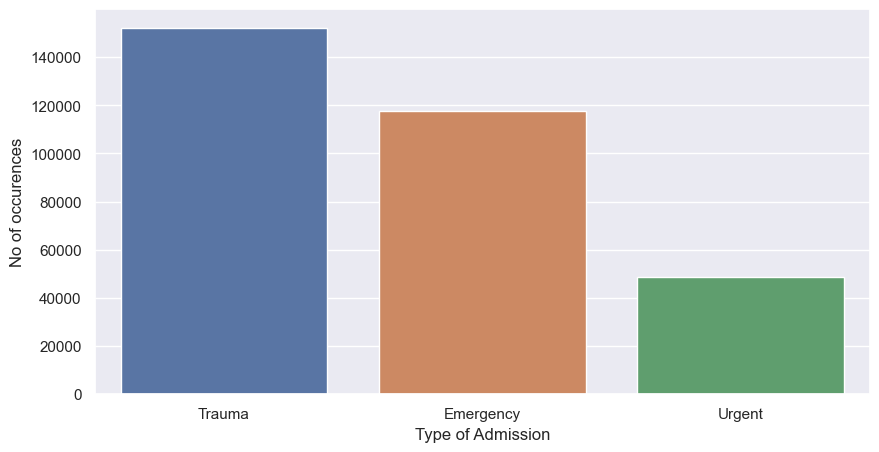

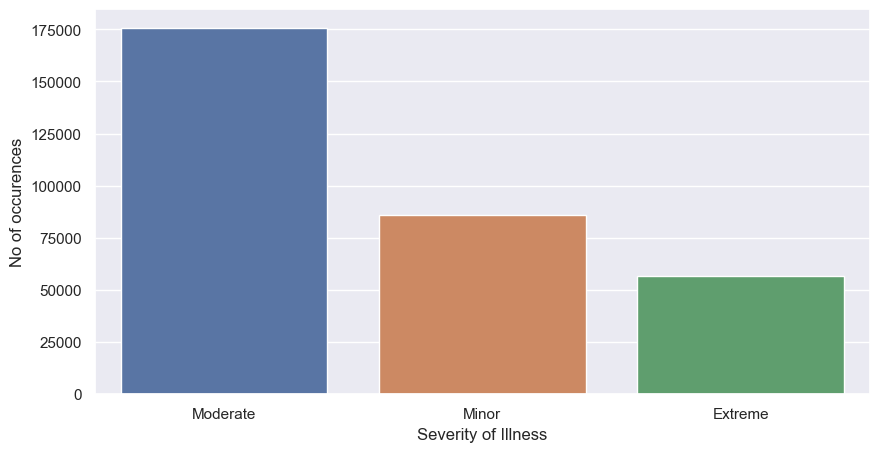

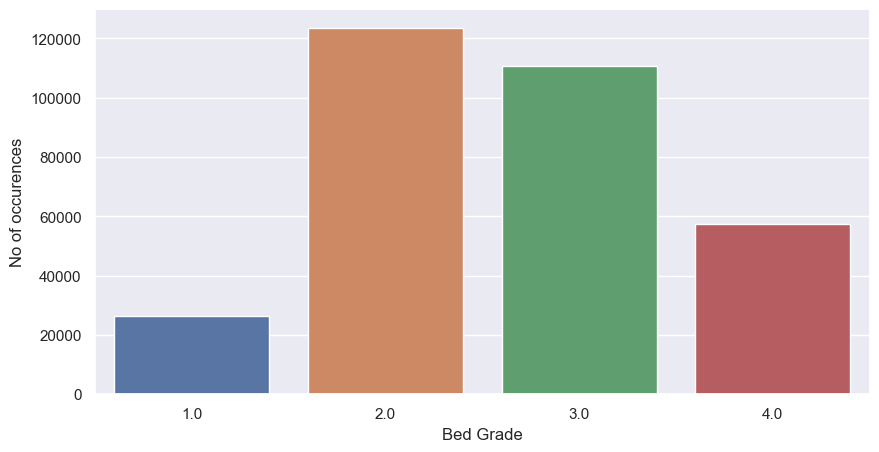

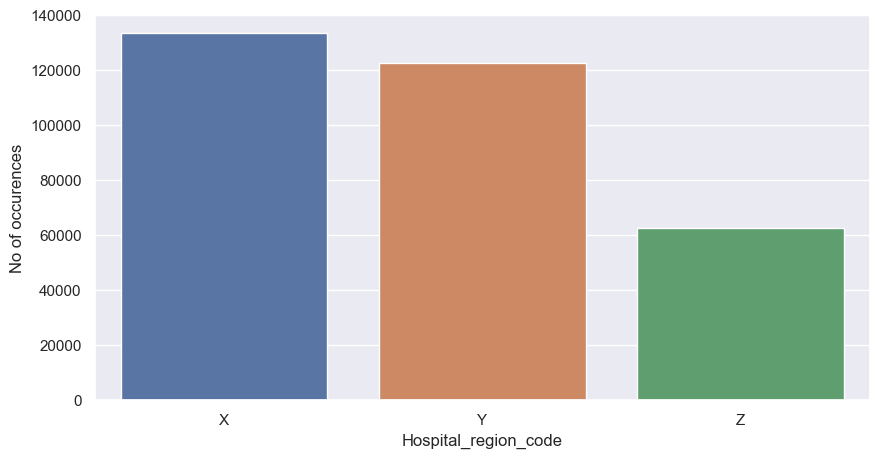

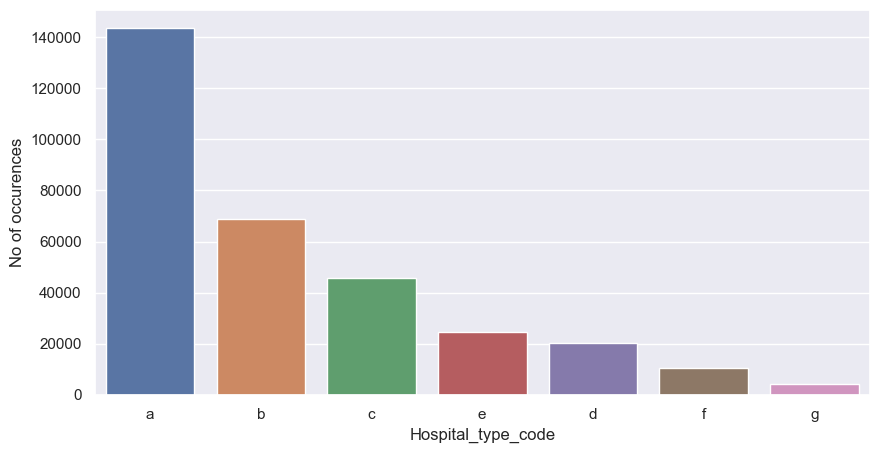

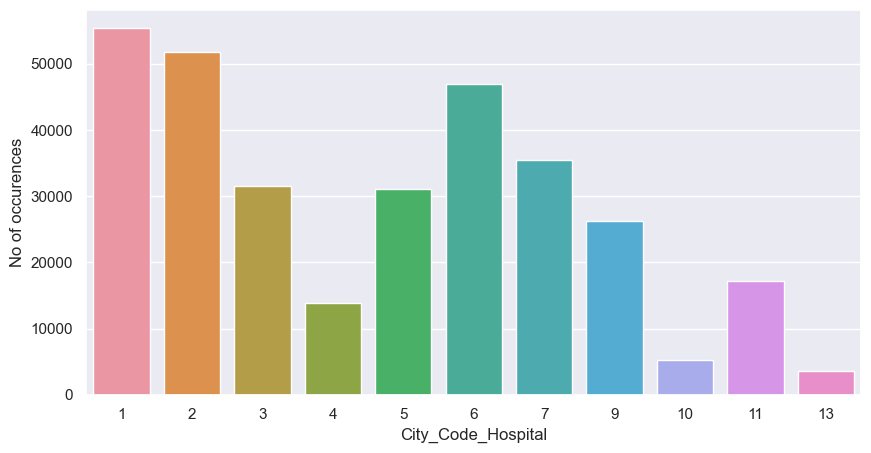

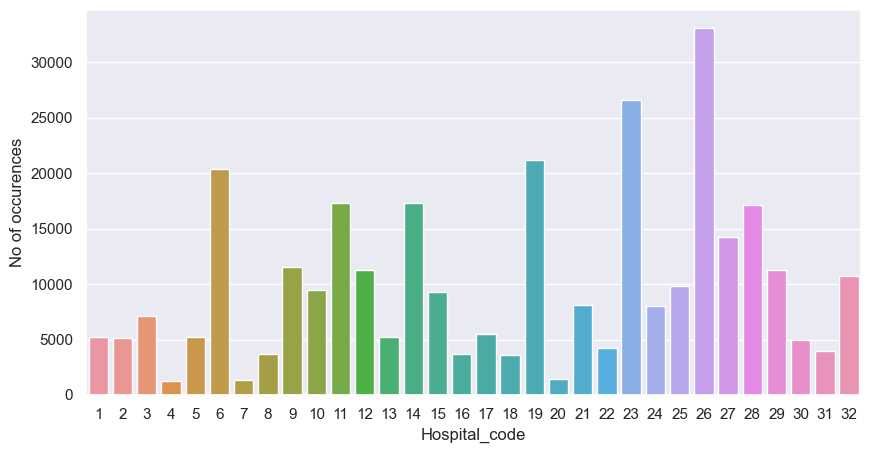

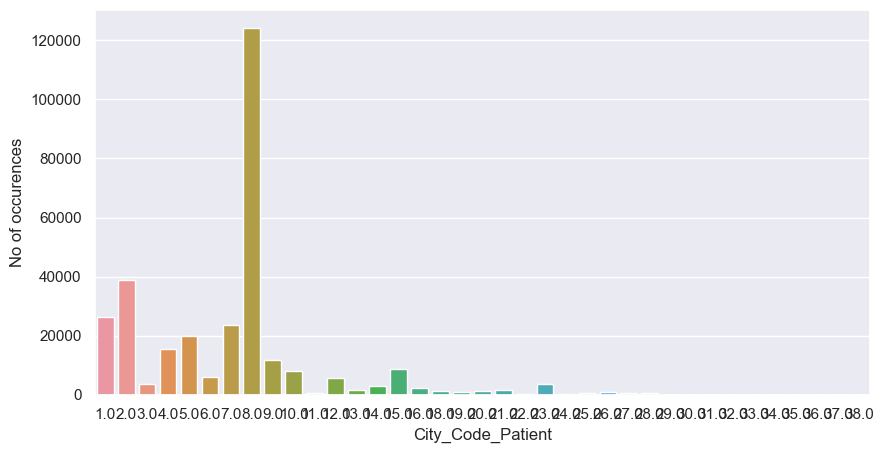

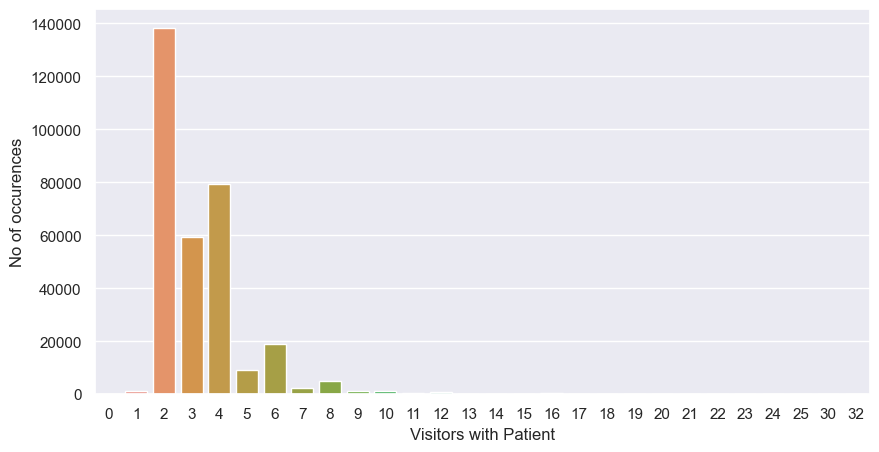

In [286]:
train['Stay'] .replace('More than 100 Days', '>100', inplace=True)

for i in [ 'Stay', 'Department', 'Available Extra Rooms in Hospital', 'Ward_Type' ,'Ward_Facility_Code', 'Age', 
          'Type of Admission', 'Severity of Illness', 'Bed Grade', 'Hospital_region_code', 'Hospital_type_code' ,  
          'City_Code_Hospital', 'Hospital_code', 'City_Code_Patient', 'Visitors with Patient']:
            count = train[i].value_counts()

            plt.figure(figsize=(10,5))

            sns.barplot(x=count.index.values, y=count.values,data=train)
            
            plt.xlabel(i)
            plt.ylabel('No of occurences')

* Data related to patients stay between 0 - 60 days is more than the data of patients stay more than 60 days.
* Most of the patients were admitted in gynecology department.
* 2 - 4 rooms are mostly available in Hospitals.
* Mostly patients were admitted in 'R', 'S' and 'Q' type of ward.
* Patients were mostly between age  of 31-60 years.
* Moderate severity of illness were highly recorded.

#### Bivariate Analysis

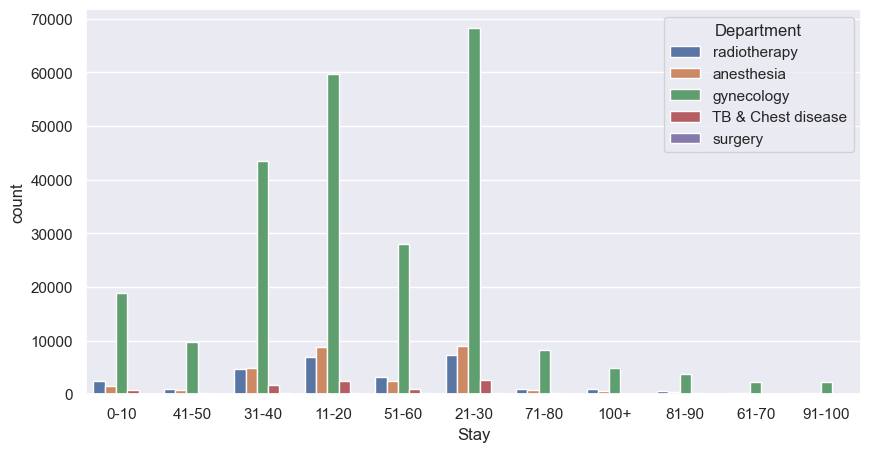

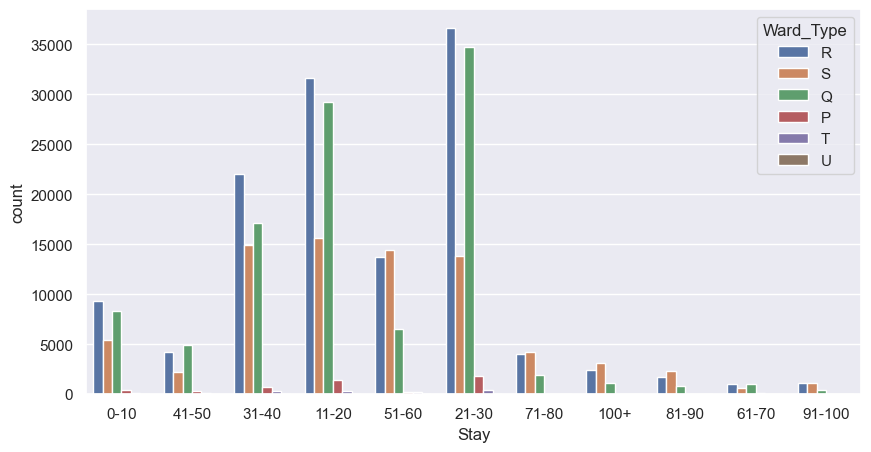

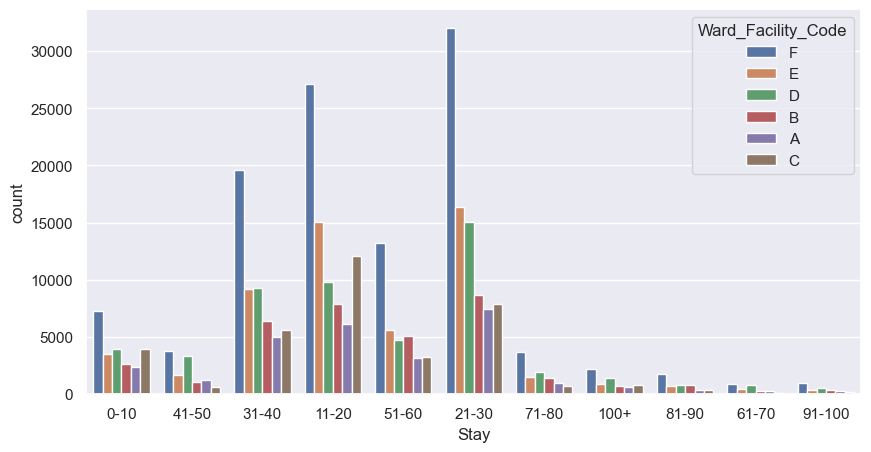

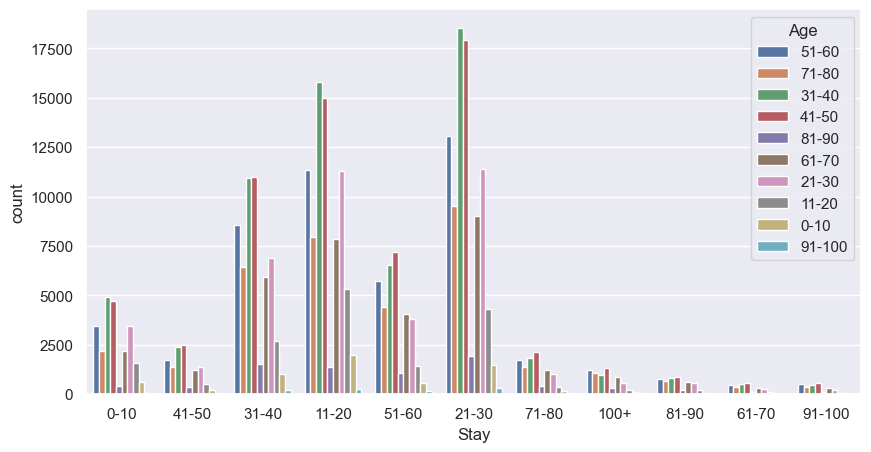

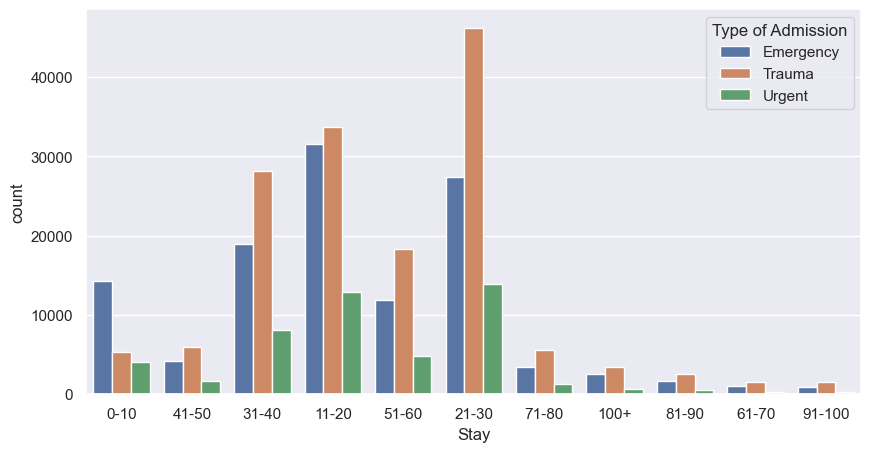

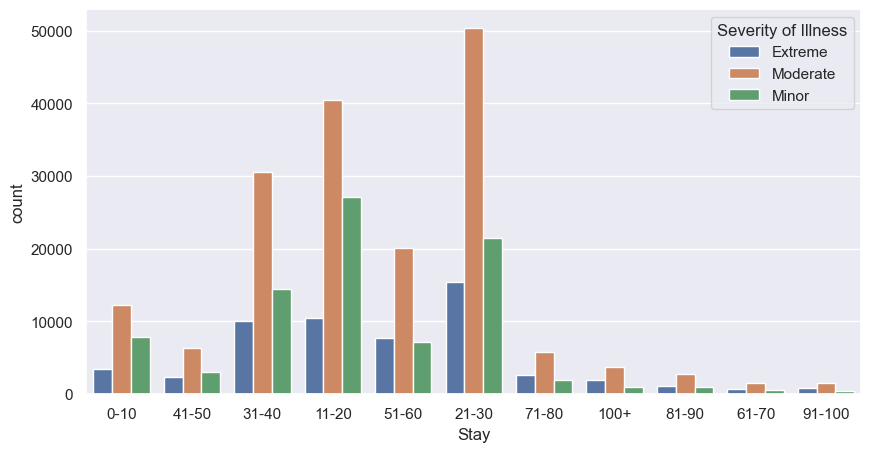

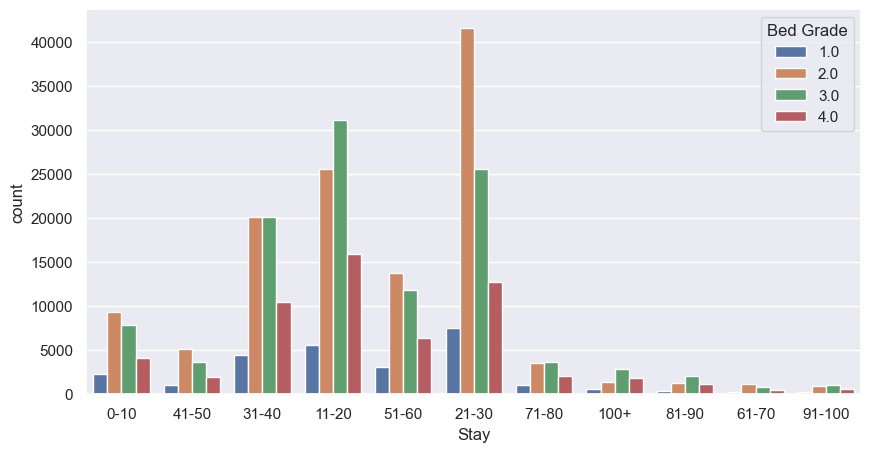

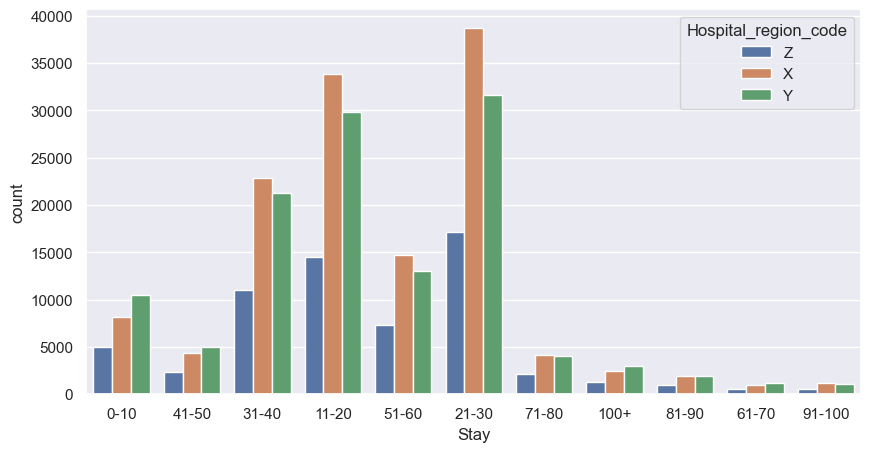

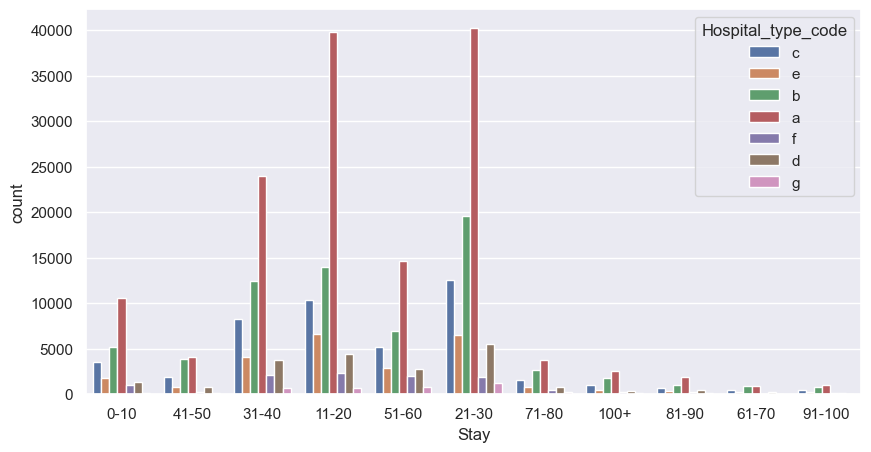

In [287]:
for i in [ 'Department', 'Ward_Type' ,'Ward_Facility_Code', 'Age', 'Type of Admission', 'Severity of Illness', 
          'Bed Grade', 'Hospital_region_code', 'Hospital_type_code' ]:

            plt.figure(figsize=(10,5))

            sns.countplot(x='Stay',hue=i,data=train)

#### Inferences
- In graph 1, gynecology has the most observations with highest number of records for 21-30 Days Stay.
- In graph 2, ward type R and Q recorded the most number of patients for 21-30 Days and 11-20 Days.
- In graph 3, ward Facility code ward F and E has the most number of patients for 11-60 days.
- In graph 4, patients aged between 31-50 recorded most number of stays between 11-30 days.
- In graph 5, patients suffering Trauma recorded the highest with 11-30 days.
- In graph 6, patients with moderate and minor severity of illness recorded with highest number of days between 11-30 days.
- In graph 7, bed grade 2.0 and 3.0 were mostly used for each category of length of stay.
- In graph 8, Hospital region code X and Y  are in for every category of length of stay.
- In graph 9, Hospital type code a, b and c are in for every category of length of stay.


#### Numerical Features

<AxesSubplot: xlabel='Admission_Deposit', ylabel='Density'>

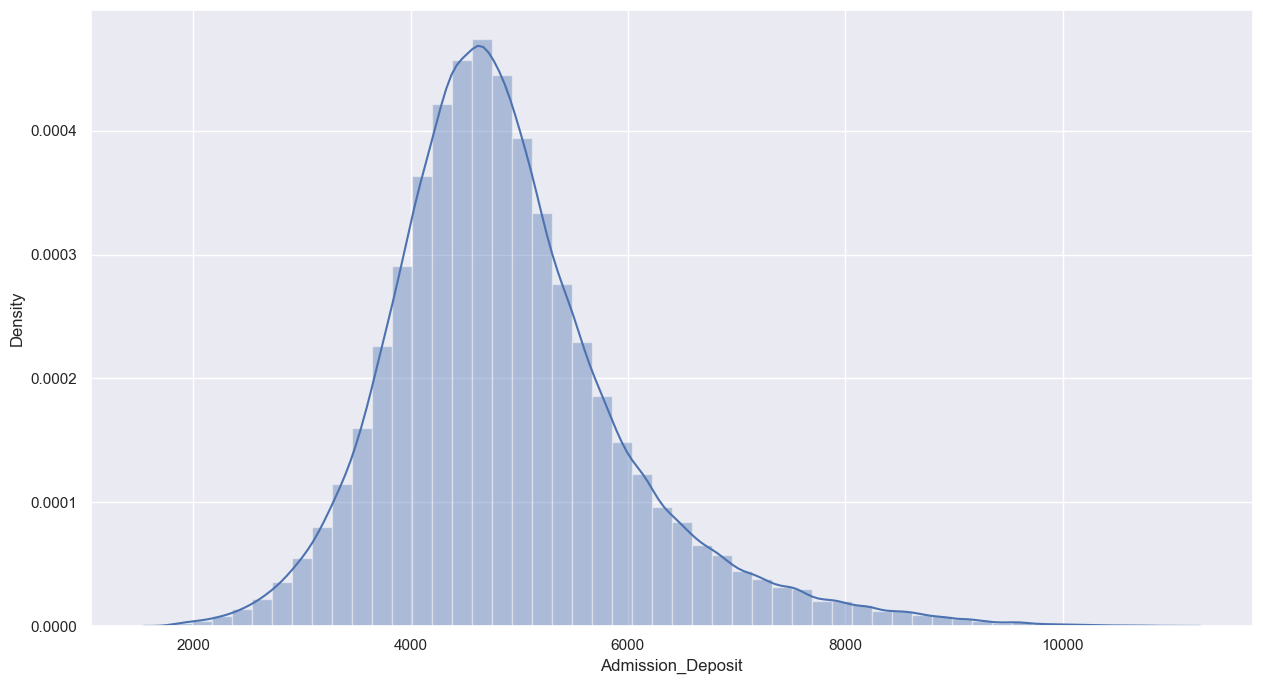

In [288]:
sns.distplot( train['Admission_Deposit'])

### Missing Value Treatment
##### For Train Data

In [289]:
Total = train.isnull().sum().sort_values(ascending=False)          

Percent = (train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
City_Code_Patient,4532,1.423197
Bed Grade,113,0.035486
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000


In [290]:
Total = train.isnull().sum().sort_values(ascending=False)          

Percent = (train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
City_Code_Patient,4532,1.423197
Bed Grade,113,0.035486
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000


##### For Test Data

In [291]:
Total = test.isnull().sum().sort_values(ascending=False)          

Percent = (test.isnull().sum()*100/test.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
City_Code_Patient,2157,1.573798
Bed Grade,35,0.025537
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000


### Dropping unwanted columns

In [292]:
train.dropna(subset = ['Bed Grade', 'City_Code_Patient'], inplace = True)

In [293]:
test['Bed Grade'] = test['Bed Grade'].fillna(test['Bed Grade'].mode()[0], inplace = True)
test['City_Code_Patient'] = test['City_Code_Patient'].fillna(test['City_Code_Patient'].mode()[0], inplace = True)

In [294]:
df_num_train = train.select_dtypes([np.number])
df_num_train.head()

,Visitors with Patient,Admission_Deposit
0,2,4911.0
1,2,5954.0
2,2,4745.0
3,2,7272.0
4,2,5558.0


In [295]:
df_cat_train = train.select_dtypes([np.object])
df_cat_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,51-60,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,51-60,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,51-60,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,51-60,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,51-60,41-50


In [296]:
df_num_test = test.select_dtypes([np.number])
df_num_test.head()

,Visitors with Patient,Admission_Deposit
0,2,3095.0
1,4,4018.0
2,3,4492.0
3,3,4173.0
4,4,4161.0


In [297]:
df_cat_test = test.select_dtypes([np.object])
df_cat_test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age
0,21,c,3,Z,3,gynecology,S,A,None,None,Emergency,Moderate,71-80
1,29,a,4,X,2,gynecology,S,F,None,None,Trauma,Moderate,71-80
2,26,b,2,Y,3,gynecology,Q,D,None,None,Emergency,Moderate,71-80
3,6,a,6,X,3,gynecology,Q,F,None,None,Trauma,Moderate,71-80
4,28,b,11,X,2,gynecology,R,F,None,None,Trauma,Moderate,71-80


### Encoding

In [298]:
admission_encode  = {'Trauma': 1, 'Urgent': 2, 'Emergency' : 3 }
severity_encode   = {'Minor': 1, 'Moderate': 2, 'Extreme': 3 }


df_cat_train['Type of Admission']  =  df_cat_train['Type of Admission'].map (admission_encode)
df_cat_train['Severity of Illness']  =  df_cat_train['Severity of Illness'].map (severity_encode)

df_cat_test['Type of Admission']  =  df_cat_test['Type of Admission'].map (admission_encode)
df_cat_test['Severity of Illness']  =  df_cat_test['Severity of Illness'].map (severity_encode)

In [299]:
df_cat_train['Stay']= df_cat_train['Stay'].replace({'0-10':1, '11-20':2, '21-30':3, '31-40':4, '41-50':5, '51-60':6,'61-70':7,
                                      '71-80':8,'81-90':9,'91-100':10,'100+':11})

df_cat_train['Age']= df_cat_train['Age'].replace({'0-10':1, '11-20':2, '21-30':3, '31-40':4, '41-50':5, '51-60':6,'61-70':7,
                                      '71-80':8,'81-90':9,'91-100':10})

df_cat_test['Age']= df_cat_test['Age'].replace({'0-10':1, '11-20':2, '21-30':3, '31-40':4, '41-50':5, '51-60':6,'61-70':7,
                                      '71-80':8,'81-90':9,'91-100':10})

In [300]:
df_cat_train['Stay']=df_cat_train['Stay'].astype(int)

##### For Train Data

In [301]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df_cat_train['Hospital_code']=LE.fit_transform(df_cat_train['Hospital_code'])
df_cat_train['Hospital_type_code']=LE.fit_transform(df_cat_train['Hospital_type_code'])
df_cat_train['City_Code_Hospital']=LE.fit_transform(df_cat_train['City_Code_Hospital'])
df_cat_train['Hospital_region_code']=LE.fit_transform(df_cat_train['Hospital_region_code'])
df_cat_train['Department']=LE.fit_transform(df_cat_train['Department'])
df_cat_train['Ward_Type']=LE.fit_transform(df_cat_train['Ward_Type'])
df_cat_train['Ward_Facility_Code']=LE.fit_transform(df_cat_train['Ward_Facility_Code'])
df_cat_train['City_Code_Patient']=LE.fit_transform(df_cat_train['City_Code_Patient'])
df_cat_train['Bed Grade']=LE.fit_transform(df_cat_train['Bed Grade'])

df_cat_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
0,7,2,2,2,3,3,2,5,1,6,3,3,6,1
1,1,2,4,2,2,3,3,5,1,6,1,3,6,5
2,9,4,0,0,2,1,3,4,1,6,1,3,6,4
3,25,1,1,1,2,3,2,3,1,6,1,3,6,5
4,25,1,1,1,2,3,3,3,1,6,1,3,6,5


##### For Test Data

In [302]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df_cat_test['Hospital_code']=LE.fit_transform(df_cat_test['Hospital_code'])
df_cat_test['Hospital_type_code']=LE.fit_transform(df_cat_test['Hospital_type_code'])
df_cat_test['City_Code_Hospital']=LE.fit_transform(df_cat_test['City_Code_Hospital'])
df_cat_test['Hospital_region_code']=LE.fit_transform(df_cat_test['Hospital_region_code'])
df_cat_test['Department']=LE.fit_transform(df_cat_test['Department'])
df_cat_test['Ward_Type']=LE.fit_transform(df_cat_test['Ward_Type'])
df_cat_test['Ward_Facility_Code']=LE.fit_transform(df_cat_test['Ward_Facility_Code'])
df_cat_test['City_Code_Patient']=LE.fit_transform(df_cat_test['City_Code_Patient'])
df_cat_test['Bed Grade']=LE.fit_transform(df_cat_test['Bed Grade'])

df_cat_test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age
0,20,2,2,2,3,2,3,0,0,0,3,2,8
1,28,0,3,0,2,2,3,5,0,0,1,2,8
2,25,1,1,1,3,2,1,3,0,0,3,2,8
3,5,0,5,0,3,2,1,5,0,0,1,2,8
4,27,1,9,0,2,2,2,5,0,0,1,2,8


### Scaling the Data

In [303]:
from sklearn.preprocessing import StandardScaler
# For training Data
sc = StandardScaler()

num_scaled = sc.fit_transform(df_num_train)

df_num_scaled = pd.DataFrame(num_scaled, columns = df_num_train.columns)

In [304]:
# For test Data

num_scaled_test = sc.fit_transform(df_num_test)

df_num_scaled_test = pd.DataFrame(num_scaled_test, columns = df_num_test.columns)

In [305]:
df_num_scaled.shape

(313793, 2)

In [306]:
df_cat_train = df_cat_train.reset_index(drop=True)

In [307]:
df_num_scaled = df_num_scaled.reset_index(drop=True)

In [308]:
df_cat_test = df_cat_test.reset_index(drop=True)
df_num_scaled_test = df_num_scaled_test.reset_index(drop=True)

In [309]:
df_cat_train.shape

(313793, 14)

In [310]:
df_full = pd.concat([df_num_scaled, df_cat_train],axis=1)
df_full_test =  pd.concat([df_num_scaled_test, df_cat_test],axis=1)

### Train Test Split

In [311]:
X = df_full.drop('Stay',axis=1)
y = df_full['Stay']

In [312]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (219655, 16)
y_train (219655,)
X_test (94138, 16)
y_test (94138,)


### Model Building and Performance Evaluation
### Logistic Regression

In [313]:
LR = LogisticRegression()

LR.fit(X_train,y_train)

y_pred_LR=LR.predict(X_test)
accuracy_score(y_test,y_pred_LR)*100 

37.94217000573626

In [314]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           1       0.48      0.02      0.03      6901
           2       0.37      0.45      0.41     23205
           3       0.40      0.64      0.49     25792
           4       0.32      0.19      0.24     16289
           5       0.00      0.00      0.00      3439
           6       0.37      0.46      0.41     10470
           7       0.00      0.00      0.00       822
           8       0.00      0.00      0.00      3093
           9       0.11      0.00      0.01      1412
          10       0.00      0.00      0.00       782
          11       0.49      0.32      0.39      1933

    accuracy                           0.38     94138
   macro avg       0.23      0.19      0.18     94138
weighted avg       0.34      0.38      0.33     94138



### Random Forest

In [315]:
rf_classification = RandomForestClassifier(random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

In [316]:
y_pred_RF = rf_model.predict(X_test)
accuracy_score(y_test,y_pred_RF)*100 

38.315026875438186

In [317]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           1       0.30      0.19      0.23      6901
           2       0.39      0.44      0.42     23205
           3       0.41      0.54      0.47     25792
           4       0.33      0.27      0.29     16289
           5       0.09      0.02      0.04      3439
           6       0.40      0.44      0.42     10470
           7       0.10      0.02      0.03       822
           8       0.28      0.10      0.15      3093
           9       0.37      0.22      0.28      1412
          10       0.24      0.06      0.09       782
          11       0.52      0.44      0.48      1933

    accuracy                           0.38     94138
   macro avg       0.31      0.25      0.26     94138
weighted avg       0.36      0.38      0.37     94138



### Naive Bayes

In [318]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [319]:
NB.fit(X_train,y_train)

GaussianNB()

In [320]:
y_pred_NB = NB.predict(X_test)
accuracy_score(y_test,y_pred_NB)*100 

36.37850814761308

In [321]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           1       0.30      0.09      0.14      6901
           2       0.36      0.41      0.39     23205
           3       0.39      0.65      0.49     25792
           4       0.32      0.15      0.21     16289
           5       0.08      0.01      0.01      3439
           6       0.33      0.38      0.36     10470
           7       0.04      0.00      0.00       822
           8       0.10      0.01      0.02      3093
           9       0.12      0.02      0.04      1412
          10       0.50      0.00      0.00       782
          11       0.42      0.37      0.39      1933

    accuracy                           0.36     94138
   macro avg       0.27      0.19      0.18     94138
weighted avg       0.33      0.36      0.32     94138



### KNN

In [322]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=565,weights='distance')  

In [323]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=565, weights='distance')

In [324]:
y_pred_KNN = NB.predict(X_test)
accuracy_score(y_test,y_pred_KNN)*100 

36.37850814761308

In [325]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           1       0.30      0.09      0.14      6901
           2       0.36      0.41      0.39     23205
           3       0.39      0.65      0.49     25792
           4       0.32      0.15      0.21     16289
           5       0.08      0.01      0.01      3439
           6       0.33      0.38      0.36     10470
           7       0.04      0.00      0.00       822
           8       0.10      0.01      0.02      3093
           9       0.12      0.02      0.04      1412
          10       0.50      0.00      0.00       782
          11       0.42      0.37      0.39      1933

    accuracy                           0.36     94138
   macro avg       0.27      0.19      0.18     94138
weighted avg       0.33      0.36      0.32     94138



### CatBoost

In [326]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(random_state=10,use_best_model=True,iterations=1000)
cb.fit(X_train,y_train,use_best_model=True,verbose=100,eval_set=(X_test,y_test))

Learning rate set to 0.120271
0:	learn: 2.1972797	test: 2.1978440	best: 2.1978440 (0)	total: 170ms	remaining: 2m 49s
100:	learn: 1.5115382	test: 1.5242638	best: 1.5242638 (100)	total: 16.5s	remaining: 2m 26s
200:	learn: 1.4818453	test: 1.5070444	best: 1.5070444 (200)	total: 33.1s	remaining: 2m 11s
300:	learn: 1.4638516	test: 1.5016071	best: 1.5016071 (300)	total: 49.3s	remaining: 1m 54s
400:	learn: 1.4484799	test: 1.4983697	best: 1.4983697 (400)	total: 1m 5s	remaining: 1m 38s
500:	learn: 1.4345747	test: 1.4970449	best: 1.4970449 (500)	total: 1m 22s	remaining: 1m 21s
600:	learn: 1.4237650	test: 1.4965192	best: 1.4964737 (579)	total: 1m 38s	remaining: 1m 5s
700:	learn: 1.4123374	test: 1.4963260	best: 1.4961744 (652)	total: 1m 54s	remaining: 48.7s
800:	learn: 1.4018164	test: 1.4964416	best: 1.4961744 (652)	total: 2m 10s	remaining: 32.4s
900:	learn: 1.3915056	test: 1.4967396	best: 1.4961744 (652)	total: 2m 26s	remaining: 16.1s
999:	learn: 1.3815565	test: 1.4971529	best: 1.4961744 (652)	tot

In [327]:
cb_pred = cb.predict(X_test)
accuracy_score(y_test,cb_pred)*100 

42.54180033567741

In [328]:
print(classification_report(y_test,cb_pred))

              precision    recall  f1-score   support

           1       0.41      0.16      0.23      6901
           2       0.43      0.51      0.47     23205
           3       0.43      0.66      0.52     25792
           4       0.41      0.24      0.30     16289
           5       0.24      0.00      0.01      3439
           6       0.41      0.48      0.44     10470
           7       0.12      0.00      0.00       822
           8       0.42      0.03      0.05      3093
           9       0.36      0.21      0.27      1412
          10       0.29      0.01      0.02       782
          11       0.52      0.43      0.47      1933

    accuracy                           0.43     94138
   macro avg       0.37      0.25      0.25     94138
weighted avg       0.41      0.43      0.39     94138



In [329]:
cb_pred_train= cb.predict(X_train)
accuracy_score(y_train,cb_pred_train)*100 

45.57692745441715

In [330]:
print(classification_report(y_train,cb_pred_train))

              precision    recall  f1-score   support

           1       0.46      0.19      0.27     16349
           2       0.45      0.54      0.49     53890
           3       0.45      0.68      0.54     60524
           4       0.47      0.26      0.34     38023
           5       0.63      0.01      0.02      8102
           6       0.45      0.53      0.48     23993
           7       0.79      0.01      0.02      1876
           8       0.71      0.06      0.10      7003
           9       0.55      0.31      0.40      3349
          10       0.84      0.07      0.12      1931
          11       0.62      0.51      0.56      4615

    accuracy                           0.46    219655
   macro avg       0.58      0.29      0.30    219655
weighted avg       0.48      0.46      0.42    219655



### Accuracy Score of Categorical Boot is Higher

### Prediction of LOS of each patient with 11 different classes

In [331]:
ls  =  df_full_test.columns.tolist()

in_data  =  df_full_test[ls]

out_data =  cb.predict (in_data)

In [332]:
test = pd.read_csv(r'C:\Users\J\Downloads\Healthcare_Data\test_data.csv')
result =  pd.DataFrame()

In [333]:
result ['case_id']  =  test['case_id']
result ['Stay']     =  out_data

stay_decode         =  {  1 : '0-10', 2 : '11-20', 3 : '21-30', 4 : '31-40', 5 : '41-50', 6 : '51-60', 7 : '61-70',8 : '71-80', 9 : '81-90', 
                         10 : '91-100', 11 : 'More than 100 Days' }

result ['Stay']     =  result ['Stay'].map(stay_decode)

result.head(15)

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
5,318444,21-30
6,318445,21-30
7,318446,21-30
8,318447,21-30
9,318448,21-30


In [334]:
count = result ['Stay'].value_counts()
count

21-30                 85076
51-60                 23685
11-20                 12285
31-40                  6693
0-10                   5242
More than 100 Days     2407
81-90                  1329
71-80                   174
41-50                   127
91-100                   32
61-70                     7
Name: Stay, dtype: int64

<AxesSubplot: >

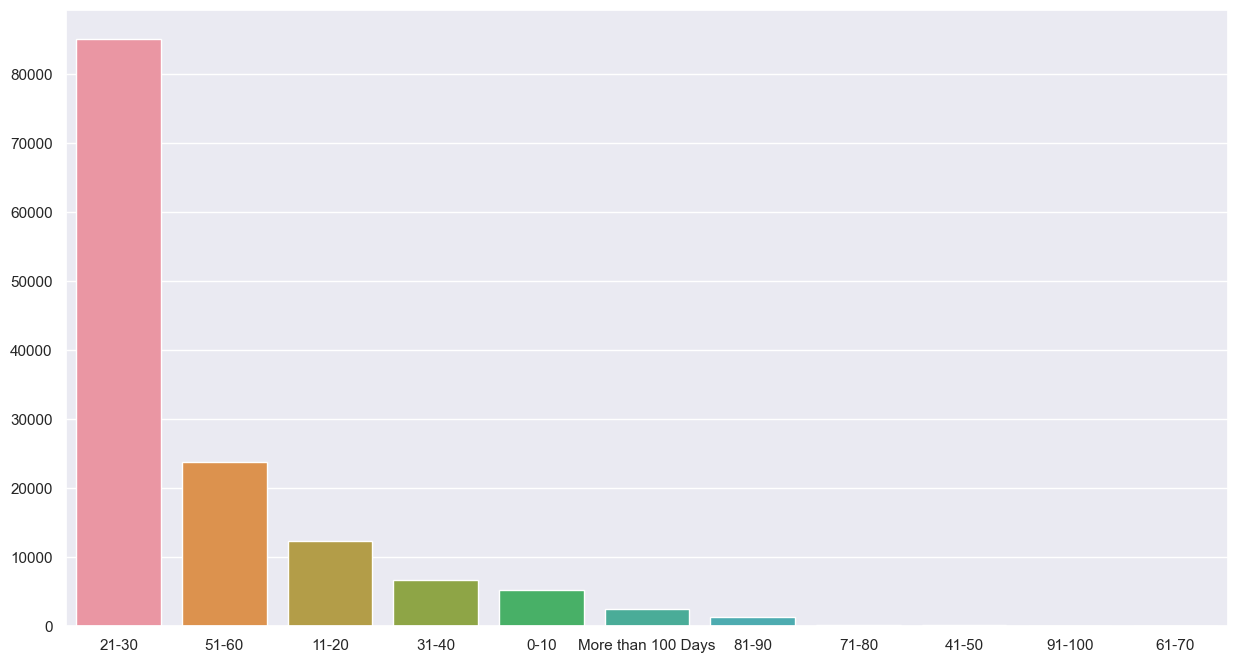

In [335]:
sns.barplot(x=count.index.values, y=count.values,data=result)